## PyTorch Learning-Rate-Scheduler - including Custom

Learning Rate is an important hyperparameter in Gradient Descent. Its value determines how fast the Neural Network would converge to minima. 

If the learning rate is too low for the Neural Network the process of convergence would be very slow and if it’s too high the converging would be fast but there is a chance that the loss might overshoot.

![Imgur](https://imgur.com/gjLnkwA.png)

### Why adjust Learning Rate?

Instead of taking a constant learning rate, we can start with a higher value of LR and then keep decreasing its value periodically after certain iterations. This way we can initially have faster convergence whilst reducing the chances of overshooting the loss. In order to implement this we can use various scheduler in optim library in PyTorch. The format of a training loop is as following:-

In [1]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.models import AlexNet
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
model = AlexNet(num_classes=2)
optimizer = optim.SGD(params=model.parameters(), lr=0.001)

torch.optim.lr_scheduler provides several methods to adjust the learning rate based on the number of epochs.

## MULTISTEPLR

* **optimizer (Optimizer)** – Wrapped optimizer.

* **milestones** (list) – List of epoch indices. Must be increasing.

* **gamma** (float) – Multiplicative factor of learning rate decay. Default: 0.1.

* **last_epoch** (int) – The index of last epoch. Default: -1.

* **verbose** (bool) – If True, prints a message to stdout for each update. Default:

[0.001]


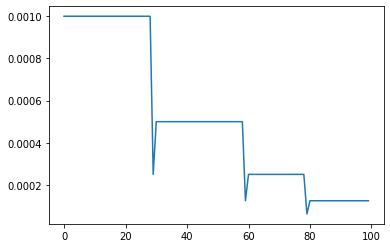

In [3]:
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[30,60,80],gamma= 0.5)
print(scheduler.get_lr())
plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step() # optimizer.step() updates all the parameters based on parameter.grad
    scheduler.step()
    ''' Because you step your scheduler after your epoch, then the first epoch will have your initial value which is set to 0.001. If you run for multiple epochs then it will continue to be decayed '''
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

#### So we can see above at each of the milestones the Learning rate dropped.

------------------------------------------------


## LambdaLR

### Understanding `lr_lambda` arg in `torch.optim.lr_scheduler.LambdaLR`

lr_lambda Sets the learning rate of each parameter group to the initial lr times a given function. When last_epoch=-1, sets initial lr as lr.

The new learning rate is always calculated like that:

### lr_epoch = lr_initial ∗ Lambda(epoch)

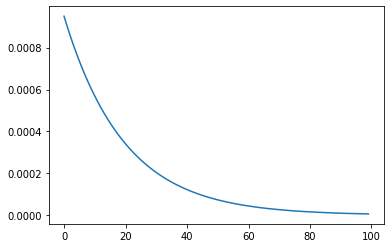

In [4]:
# lambda1 = lambda epoch: epoch // 30 # epoch//30 * init_lr（0.05）
lambda2 = lambda epoch: 0.95 ** epoch 
# double-asterisk (**) is defined as an Exponentiation Operator:

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda= lambda2)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])   
plt.plot(x, y)

--------------------------
## ExponentialLR

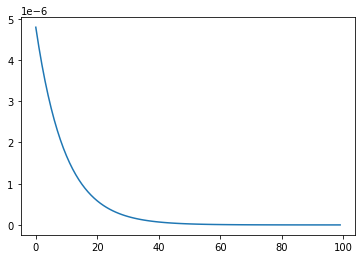

In [5]:
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

-------------------------

## CosineAnnealingLR

Cosine AnnealingLR is a scheduling technique that starts off with a very large learning rate and then aggressively decreases it to a value near 0, before again increasing the learning rate.


It is the minimum achievable learning rate with the given cosine annealing schedule.

![Imgur](https://imgur.com/pE6Njsg.png)


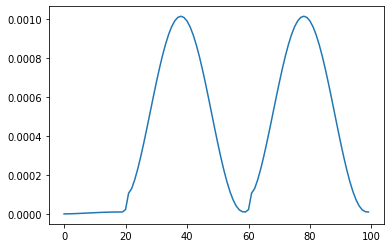

In [6]:
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min = 1e-5)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

## CosineAnnealingWarmRestarts

Key concept is -  In order to find a more stable local minimum, we can increase the learning rate from time to time, encouraging the model to “jump” from one local minimum to another if it is in a steep trough. This is the “restarts” in Stochastic Gradient Descent with Restarts.


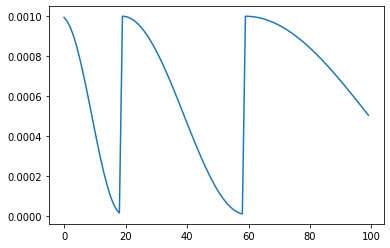

In [7]:
scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20, T_mult=2, eta_min = 1e-5)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

## CyclicLR

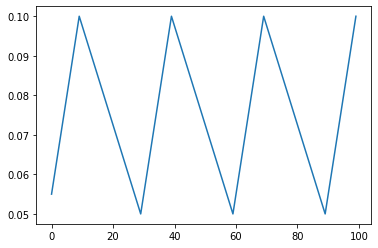

In [8]:
scheduler = lr_scheduler.CyclicLR(optimizer,base_lr=0.05,max_lr=0.1,step_size_up=10,step_size_down=20)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)

## OneCycleLR

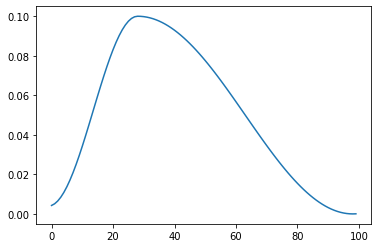

In [9]:
scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10)
# (optimizer, max_lr=0.01, steps_per_epoch=len(data_loader), epochs=10)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)

# Custom Learning Rate Scheduling for CycleGAN Paper

In [ ]:
class LambdaLR:
    def __init__(self, n_epochs, offset, decay_start_epoch):
        assert (
            n_epochs - decay_start_epoch
        ) > 0, "Decay must start before the training session ends!"
        self.n_epochs = n_epochs
        self.offset = offset
        self.decay_start_epoch = decay_start_epoch

    def step(self, epoch):
        # Below line checks whether the current epoch has exceeded the decay epoch(which is 100)
        # e.g. if current epoch is 80 then max (0, 80 - 100) will be 0.
        # i.e. then entire numerator will be 0 - so 1 - 0 is 1
        # i.e. the original LR remains as it is.
        return 1.0 - max(0, epoch + self.offset - self.decay_start_epoch) / (
            self.n_epochs - self.decay_start_epoch

## Then usage of above class inside train.py file

### [My full CycleGAN Implementation code is here for your reference](https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/tree/master/Computer_Vision/60_CycleGAN_From_Scratch_PyTorch)

### [And the Link to Video for PyTorch CycleGAN Paper Implementation from Scratch - With Detailed Explanation of the Architecture](https://bit.ly/36zZWTK)


In [ ]:
##############################################
# Learning rate update schedulers
##############################################

lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(
    optimizer_G, lr_lambda=LambdaLR(hp.n_epochs, hp.epoch, hp.decay_start_epoch).step
)